# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data describes the scores and participation rate for SAT exams by state

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data appears complete however participation rates for some states are very low. 

##### 3. Create a data dictionary for the dataset.

In [65]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

sat_csv_path = '../assets/sat_scores.csv'

rows = []
with open(sat_csv_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
#print rows[0:2]

header = rows[0]
data = rows[1:]
print(header)

data_dict = {}

for index, column_name in enumerate(header):
    data_dict[column_name] = []
    for row in data:
        data_dict[column_name].append(row[index])
print data_dict

['State', 'Rate', 'Verbal', 'Math']
{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7',

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [66]:
data_list = []
for key in data_dict:
    data_list.append(data_dict[key])

##### 5. Print the data

In [67]:
print data_list

[['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], ['509', '499', '51

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [8]:
print data_list

[['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], ['509', '499', '51

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [9]:
for i in range(len(data_list[0])):
    print data_list[1][i]

CT
NJ
MA
NY
NH
RI
PA
VT
ME
VA
DE
MD
NC
GA
IN
SC
DC
OR
FL
WA
TX
HI
AK
CA
AZ
NV
CO
OH
MT
WV
ID
TN
NM
IL
KY
WY
MI
MN
KS
AL
NB
OK
MO
LA
WI
AR
UT
IA
SD
ND
MS
All


##### 8. Print the types of each column

In [18]:
for i in range(len(data_list)):
    print 'Column ', i, type(data_list[i][0])

Column  0 <type 'str'>
Column  1 <type 'str'>
Column  2 <type 'str'>
Column  3 <type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [68]:
for i in (0,2,3): 
    for j in range(len(data_list[0])):
        data_list[i][j] = float(data_list[i][j])


In [69]:
print data_list

[[510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0], ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0], [509.0, 499.0, 511

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [10]:
state_dict = {}
state_data = []
for i in range(len(data_list[0])):
    state_data = [data_list[0][i], data_list[2][i], data_list[3][i]]
    state_dict[data_list[1][i]] = state_data
print state_dict

{'WA': ['527', '53', '527'], 'DE': ['499', '67', '501'], 'DC': ['474', '56', '482'], 'WI': ['596', '6', '584'], 'WV': ['512', '18', '527'], 'HI': ['515', '52', '485'], 'FL': ['499', '54', '498'], 'WY': ['545', '11', '547'], 'NH': ['516', '72', '520'], 'NJ': ['513', '81', '499'], 'NM': ['542', '13', '551'], 'TX': ['499', '53', '493'], 'LA': ['562', '7', '564'], 'NB': ['568', '8', '562'], 'NC': ['499', '65', '493'], 'ND': ['599', '4', '592'], 'TN': ['553', '13', '562'], 'NY': ['505', '77', '495'], 'PA': ['499', '71', '500'], 'RI': ['499', '71', '501'], 'NV': ['515', '33', '509'], 'VA': ['501', '68', '510'], 'CO': ['542', '31', '539'], 'AK': ['510', '51', '514'], 'AL': ['554', '9', '559'], 'AR': ['550', '6', '562'], 'VT': ['506', '69', '511'], 'IL': ['589', '12', '576'], 'GA': ['489', '63', '491'], 'IN': ['501', '60', '499'], 'IA': ['603', '5', '593'], 'OK': ['561', '8', '567'], 'AZ': ['525', '34', '523'], 'CA': ['517', '51', '498'], 'ID': ['542', '17', '543'], 'CT': ['510', '82', '509'],

##### 11. Create a dictionary with the values for each of the numeric columns

In [70]:
d = 0
for key in data_dict:
    data_dict[key] = data_list[d]
    d+=1
print data_dict

{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 

In [60]:
del data_dict['State']
print data_dict

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564'

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [71]:
print ' key \t min \t max'
for key in data_dict:
    print key, '\t', min(data_dict[key]), '\t', max(data_dict[key])
    #COL_NAMES = '{:>5}  {:>20}  {:>15}'.format('RANK' , 'WORD' , 'COUNT' )
    

 key 	 min 	 max
Math 	439.0 	603.0
State 	AK 	WY
Rate 	4.0 	82.0
Verbal 	482.0 	593.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [75]:
def mean(lst):
    """calculates mean"""
    return sum(lst) / len(lst)

def stddev(lst):
    """returns the standard deviation of lst"""
#    if type(lst[0]) != 'string':
    mn = mean(lst)
    variance = sum([(value - mn)**2 for value in lst])
    return (variance)**.5

tempo_list = []
type(data_list[1][0])
len(data_dict)
max(data_list[0])
#tempo_list = (data_dict['Math'])
for i in [0, 2, 3]:
    tempo_list = (data_list[i])
    #print tempo_list
    #print sum(tempo_list)
    print stddev(tempo_list)


 257.198367024
194.973765494
237.354125242


In [98]:
#del data_dict['State']
print ' key \t mean \t\t stddev'
for key in data_dict:
#    print (key, type(data_dict[key]))
    print key,  '\t', mean(data_dict[key]), '\t\t',stddev(data_dict[key])
    #    for a in range(len(data_dict)):
#    if type(value[0][0]) != 'string':
#        print key, '\t', mean(data_dict[key]), '\t', stddev(data_dict[key])

    
     
    #print a , stddev(lst_a)

 key 	 mean 		 stddev
Math 	531.5 		257.198367024
Rate 	37.1538461538 		194.973765494
Verbal 	532.019230769 		237.354125242


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [115]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode()

# Setup matplotlib to display in notebook:
%matplotlib inline

In [151]:
sat_scores = pd.read_csv('../assets/sat_scores.csv')
sat_scores.columns = ['State', 'Rate', 'Verbal', 'Math']

In [152]:
print 'Sample of Dataset SAT SCORES'
print sat_scores.head()
print '\nShape of SAT SCORES:' , sat_scores.shape

Sample of Dataset SAT SCORES
  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

Shape of SAT SCORES: (52, 4)


##### 15. Plot the Math distribution

In [171]:
math = sat_scores.Math.values
verbal = sat_scores.Verbal.values

In [172]:
math = sat_scores.Math.values
type(math)
print math

# ?pl.plot

[510 513 515 505 516 499 499 506 500 501 499 510 499 489 501 488 474 526
 499 527 499 515 510 517 525 515 542 439 539 512 542 553 542 589 550 545
 572 589 580 554 568 561 577 562 596 550 570 603 582 599 551 514]


plt.hist(math)
plt.title("math scores")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

##### 16. Plot the Verbal distribution

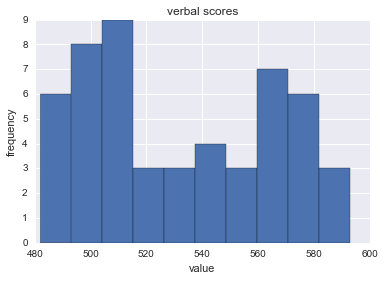

In [158]:
plt.hist(verbal)
plt.title("verbal scores")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

##### 17. What is the typical assumption for data distribution?

In [ ]:
Gaussian distribution?

##### 18. Does that distribution hold true for our data?

In [ ]:
The math data loosley approximates a normal distribution. 
The verbal data is bimodal. 

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

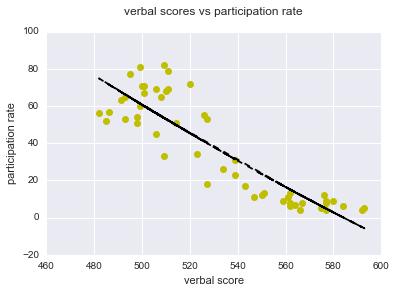

In [175]:
rate = sat_scores.Rate.values
fit = np.polyfit(verbal,rate,2)
fit_fn = np.poly1d(fit)
plt.title("verbal scores vs participation rate\n")
plt.xlabel("verbal score")
plt.ylabel("participation rate")

plt.plot(verbal,rate, 'yo', verbal, fit_fn(verbal), '--k')
plt.scatter(verbal, rate, c='darkred')


##### 20. Are there any interesting relationships to note?

In [ ]:
# Verbal scores tend to increase exponentially as participation rate decreases

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c


In [ ]:
# Exponential curve regression
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

x = math
y = rate
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

##### 21. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x103e59e90>],
 'caps': [<matplotlib.lines.Line2D at 0x11b6c7dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1187d2f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11b6c76d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11c189f50>,
  <matplotlib.lines.Line2D at 0x103e59550>]}

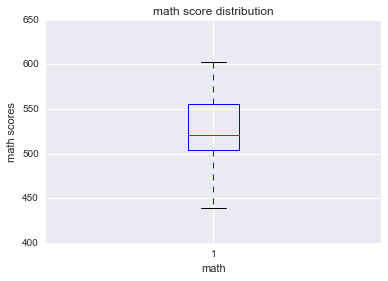

In [176]:
plt.title("math score distribution")
plt.xlabel("math")
plt.ylabel("math scores")
plt.boxplot(math)

In [ ]:
# Try using seaborn
sat_data = sns.load_dataset("../assets/sat_scores.csv")

# Plot the data with horizontal boxes
ax = sns.boxplot(x="Math", y="Verbal", data=sat_data, whis=np.inf, color="c")


##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [ ]:
# Heat Map of SAT Participation Rate data (Tableau)

![](http://snag.gy/z7viG.jpg)

!()[http://snag.gy/z7viG.jpg]

In [ ]:
# Histograms of SAT Data by State (Tableau)

![](http://snag.gy/1rRYg.jpg)

!()[http://snag.gy/1rRYg.jpg]

In [ ]:
 #Scatter Plot of SAT Verbal Scores vs Participation Rate with Exponential Regression Curve (Tableau)

![](http://snag.gy/TjpLv.jpg)

!()[http://snag.gy/TjpLv.jpg]